# Capstone Project
Author: Diana Procel   

**Brief:**  
We started the project by performing an EDA, knowing the types of data in the dataset, and their distributions through visualizations such as histograms, boxplots and barplots.
We performed an analysis of correlations between variables and multivariate visualizations using the Pairplot. 

For preprocessing we worked on text variables using encoding techniques. For ordinal text variables we used the Ordinal Encoder, and for the other text variables we used One Hot Encoding. For the numerical variables we used Min-Max Scaler technique. 

Then to build the model we applied Train Test Split leaving 80% of the data to train the model, and 20% to test the model. The models we tested were: Decision Tree, Random Forest, Xgboost and Logistic Regression. On these models we also used a hyperparameter optimization technique called Grid Seach, with which we also performed cross validation and found the best hyperparameter configuration for the listed models. 

For model evaluation we used the F1 Score metric, since we observed that the target variable was not uniformly distributed. And after model selection we identified the most important variables. 

In [64]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix 

from sklearn.metrics import make_scorer
import xgboost as xgb
from xgboost import plot_importance

In [2]:
import warnings
warnings.filterwarnings('ignore')

# EDA

In [3]:
df = pd.read_csv("E_Commerce.csv")

In [4]:
df.shape

(10999, 12)

In [5]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [6]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

The most of the columns are INT, and just 4 area STR

### Missing Values

There aren't missing values in this dataset

In [7]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

### Columns Stats

We see the main statistics of the numerical columns

In [8]:
df.drop("ID", axis = 1).describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


We review the main statistics of the STR variables

In [9]:
df.describe(include ="O")

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


Vemos la distribución de todas las variables

### Distribution of Variables

In [10]:
int_columns = ["Customer_care_calls","Customer_rating","Cost_of_the_Product","Prior_purchases", "Discount_offered","Weight_in_gms"]

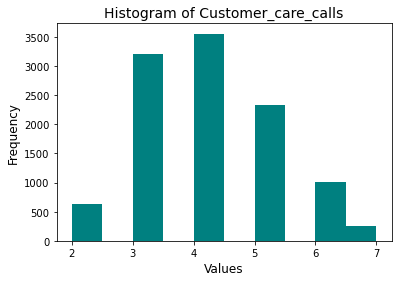

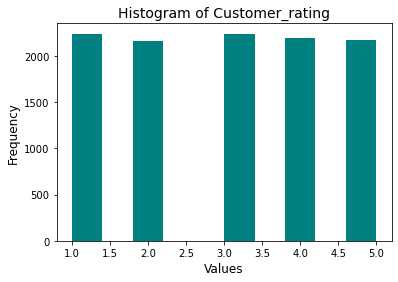

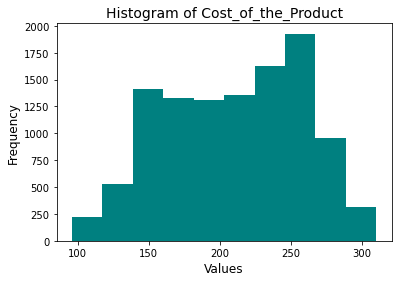

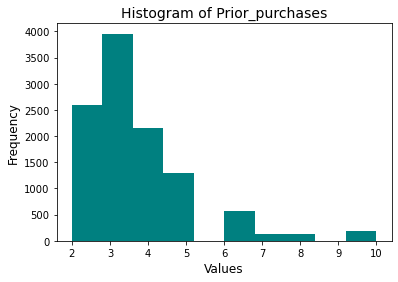

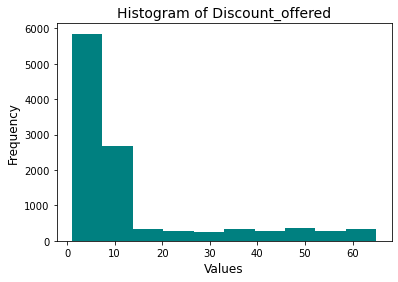

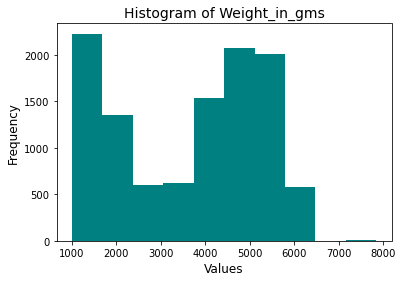

In [11]:
for column in int_columns:
    plt.hist(df[column], color= "teal")

    plt.xlabel("Values", size = 12)
    plt.ylabel("Frequency", size = 12)
    plt.title("Histogram of "+ column, size = 14)
    plt.show()
#plt.xlabel()

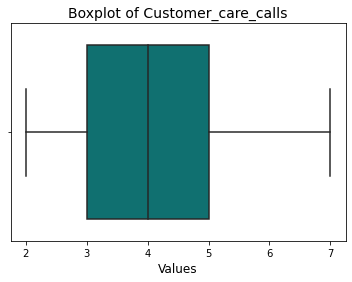

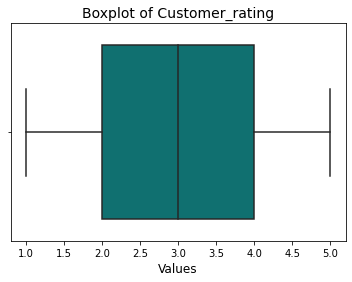

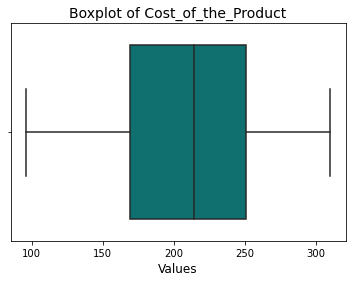

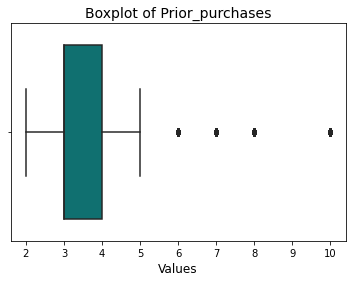

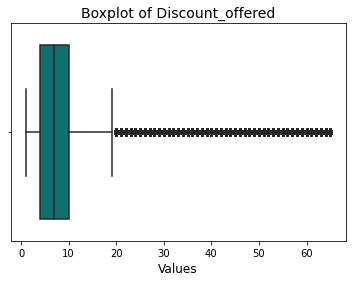

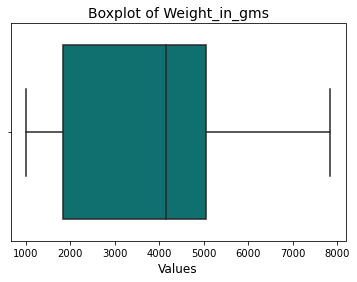

In [12]:
for column in int_columns:
    sns.boxplot(df[column], color = "teal")

    plt.xlabel("Values", size = 12)
    plt.title("Boxplot of "+ column, size = 14)
    plt.show()
#plt.xlabel()

It is observed that the variable **Discount_offered** has outliers, and this is due to its distribution skewed to the left. 

This variable could be worked by applying a logarithmic transformation.

### Distribution of STR variables

In [13]:
str_columns = ["Warehouse_block","Mode_of_Shipment","Prior_purchases"]

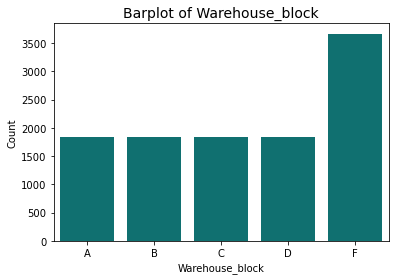

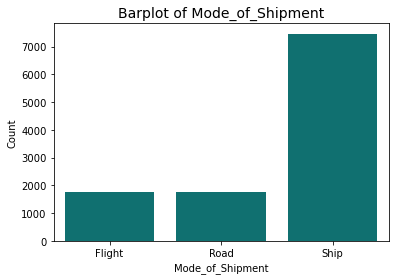

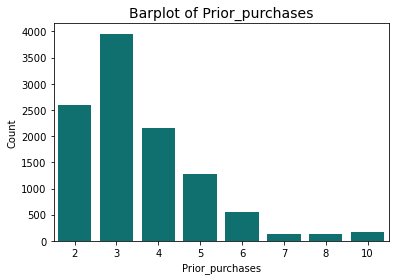

In [14]:
for column in str_columns:
    count_temp = df.groupby(column, as_index=False).agg({"ID":"count"})
    sns.barplot(x= column, y = "ID", data = count_temp, color = "teal")
    plt.title("Barplot of "+ column, size = 14)
    plt.ylabel("Count")
    plt.show()

## Distribution of target

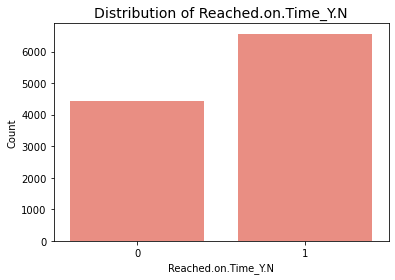

In [15]:
column = "Reached.on.Time_Y.N"
count_temp = df.groupby(column, as_index=False).agg({"ID":"count"})
sns.barplot(x= column, y = "ID", data = count_temp, color = "salmon")
plt.title("Distribution of "+ column, size = 14)
plt.ylabel("Count")
plt.show()

### Correlation Matrix

In [16]:
corr = df.drop("ID", axis=1).corr()
corr

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


## Correlation with target

In [17]:
corr["Reached.on.Time_Y.N"]

Customer_care_calls   -0.067126
Customer_rating        0.013119
Cost_of_the_Product   -0.073587
Prior_purchases       -0.055515
Discount_offered       0.397108
Weight_in_gms         -0.268793
Reached.on.Time_Y.N    1.000000
Name: Reached.on.Time_Y.N, dtype: float64

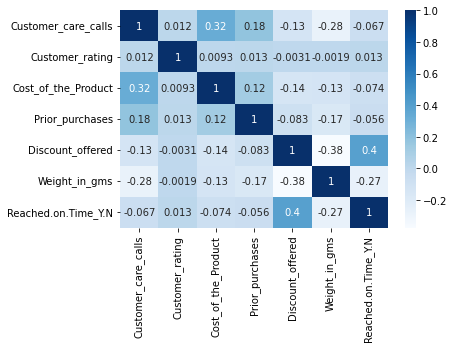

In [18]:
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

Let's select the columns with the highest correlation (positive or negative) with the target and make a pairplot.

In [19]:
columns_pairplot = ["Cost_of_the_Product", "Discount_offered", "Weight_in_gms","Reached.on.Time_Y.N"]

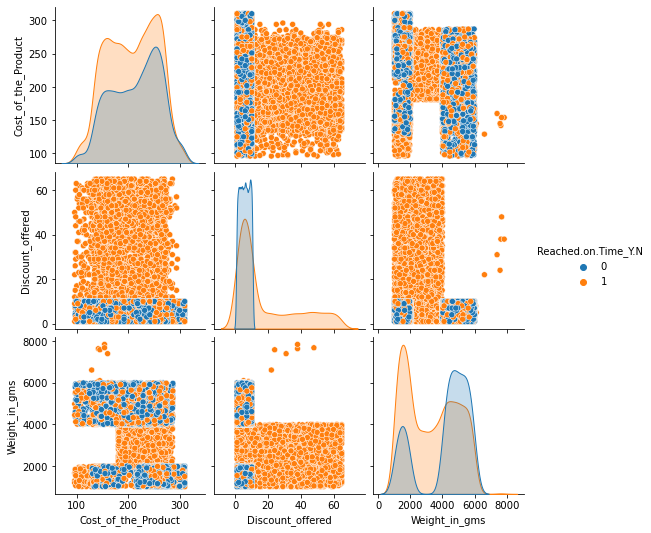

In [20]:
#sns.set_palette(sns.color_palette("deep"))
sns.pairplot(data = df[columns_pairplot], hue = "Reached.on.Time_Y.N")

## Exploratory of STR variables

In [21]:
column = str_columns[0]

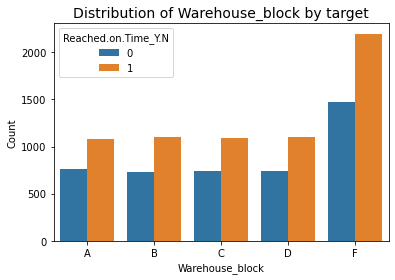

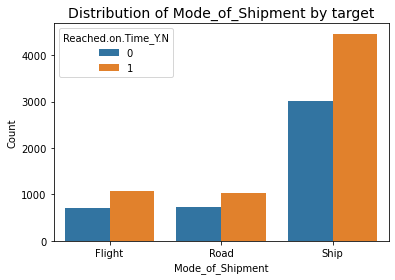

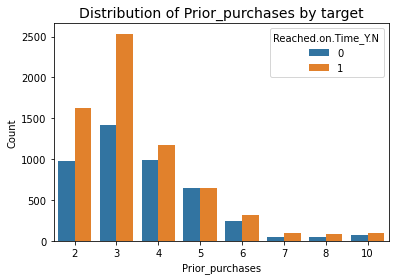

In [22]:
for column in str_columns:
    count_temp = df.groupby([column, "Reached.on.Time_Y.N"], as_index=False).agg({"ID":"count"})
    sns.barplot(x= column, y = "ID", data = count_temp, hue = "Reached.on.Time_Y.N")
    plt.title("Distribution of "+ column+" by target", size = 14)
    plt.ylabel("Count")
    plt.show()

### Conclusions

Conclusions:
* The dependent variable is not uniformly distributed, so for evaluating a future classification model, accuracy would not be the correct metric. 

* The variable discount_Offered has a skewed distribution to the right, so it has outlier. And to work with this variable we should consider using some outlier imputation technique or column transformation, such as logarithmic transformation. 

* The ID variable is not relevant to the analysis, or to the model. 

* Within the text variables, the variable Product_importance can be considered as an ordinal variable, so we can encode it keeping its order relation with Ordinal Encoding. 

* No missing values

There are very evident patterns in the data:
* All deliveries greater than 17 in discount_offered arrived on time. (This explains the correlation of 0.4 that these two variables have.
* All deliveries that weighed between 2000 and 4000 gms were on time. 
* Deliveries with priority 1 and 2, are the ones with better % of deliveries that arrived on time than the other priorities. 



# MODEL

<img src = "./DiagramaML.png">
by: Diana Procel

## Data Preprocessing

In [23]:
df.head(3)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1


In [24]:
X = df.drop(["Reached.on.Time_Y.N","ID"],axis = 1) #Features
y =  df["Reached.on.Time_Y.N"] #Target

## Data Transformation

We preprocess the variable gender

In [25]:
X["Is_male"] = X["Gender"] == "M"

In [26]:
del X["Gender"]

We preprocess the Product_importance variables using **Ordinal encoding**.

In [27]:
X["Product_importance"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [28]:
order = {
    "low":1,
    "medium": 2,
    "high": 3
}
X["Product_importance"] = X["Product_importance"].replace(order)

In [29]:
X_prepro = pd.get_dummies(X)

As we saw the **Discount_offered** variable is a left-biased variable, so we can apply the logarithmic transformation

In [30]:
X_prepro["Discount_offered"] = X_prepro["Discount_offered"].apply(math.log)

### Scaling

In [31]:
scaler = MinMaxScaler()
X_prepro[X_prepro.columns] = scaler.fit_transform(X_prepro)

## Train-Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_prepro, y, test_size=0.25, random_state=101)

In [33]:
MODELS = {
    "Modelos":[],
    "Accuracy":[],
    "F1": [],
    "Recall": [],
    "Precision":[]
}

In [34]:
modelo = tree.DecisionTreeClassifier(random_state = 101)
modelo = modelo.fit(X_train, y_train)
y_predict = modelo.predict(X_test)

In [35]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("F1:", f1_score(y_test, y_predict))

Accuracy: 0.641090909090909
Recall: 0.7084352078239609
Precision: 0.6944278010784901
F1: 0.7013615733736762


In [36]:
MODELS["Modelos"].append("DT")
MODELS["Accuracy"].append(accuracy_score(y_test, y_predict))
MODELS["Recall"].append(recall_score(y_test, y_predict))
MODELS["Precision"].append(precision_score(y_test, y_predict))
MODELS["F1"].append(f1_score(y_test, y_predict))

### Decission Tree - GS (Grid Search)

In [37]:
modelo = tree.DecisionTreeClassifier() 
param_grid = {'max_depth': [None, 3, 4, 5,7,9,10,12,15], 
              'min_samples_leaf': [1, 2, 3],
              'criterion':["gini", "entropy"],
              'min_samples_split': [2,3,4]}

grid_search = GridSearchCV(modelo, param_grid, cv=3,scoring="f1")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 4, 5, 7, 9, 10, 12, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]},
             scoring='f1')

In [38]:
best_params = grid_search.best_params_
print(f"Best params: {best_params}")

Best params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4}


Best DT Model

In [39]:
modelo = tree.DecisionTreeClassifier(**best_params,random_state = 101)
modelo = modelo.fit(X_train, y_train)
y_predict = modelo.predict(X_test)

In [40]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("F1:", f1_score(y_test, y_predict))

Accuracy: 0.6425454545454545
Recall: 0.6919315403422983
Precision: 0.7026691495965239
F1: 0.6972590083153681


In [41]:
MODELS["Modelos"].append("DT-GS")
MODELS["Accuracy"].append(accuracy_score(y_test, y_predict))
MODELS["Recall"].append(recall_score(y_test, y_predict))
MODELS["Precision"].append(precision_score(y_test, y_predict))
MODELS["F1"].append(f1_score(y_test, y_predict))

## Random Forest - Default

In [42]:
modelo = RandomForestClassifier(random_state = 101)
modelo = modelo.fit(X_train, y_train)
y_predict = modelo.predict(X_test)

In [43]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("F1:", f1_score(y_test, y_predict))

Accuracy: 0.6632727272727272
Recall: 0.6454767726161369
Precision: 0.7532097004279601
F1: 0.6951942067149441


In [44]:
MODELS["Modelos"].append("RF")
MODELS["Accuracy"].append(accuracy_score(y_test, y_predict))
MODELS["Recall"].append(recall_score(y_test, y_predict))
MODELS["Precision"].append(precision_score(y_test, y_predict))
MODELS["F1"].append(f1_score(y_test, y_predict))

## Random Forest - GS (Grid Search)

In [45]:
modelo = RandomForestClassifier()
param_grid = {'max_depth': [None, 4, 5,7,10,15], 
              'n_estimators': [50,100,200],
              'min_samples_leaf': [1, 2, 3],
              'criterion':["gini"],
              'min_samples_split': [2,3,4],
              }

grid_search = GridSearchCV(modelo, param_grid, cv=2, scoring = "f1")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [None, 4, 5, 7, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [46]:
best_params = grid_search.best_params_
print(f"Best params: {best_params}")

Best params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 50}


Best RF

In [47]:
modelo = RandomForestClassifier(**best_params)
modelo = modelo.fit(X_train, y_train)
y_predict = modelo.predict(X_test)

In [48]:
MODELS["Modelos"].append("RF-GS")
MODELS["Accuracy"].append(accuracy_score(y_test, y_predict))
MODELS["Recall"].append(recall_score(y_test, y_predict))
MODELS["Precision"].append(precision_score(y_test, y_predict))
MODELS["F1"].append(f1_score(y_test, y_predict))

In [49]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("F1:", f1_score(y_test, y_predict))

Accuracy: 0.6643636363636364
Recall: 0.6473105134474327
Precision: 0.7537366548042704
F1: 0.6964814205853337


## Xgboost

In [50]:
modelo =  xgb.XGBClassifier(random_state = 101)

In [51]:
modelo = modelo.fit(X_train, y_train) # Entrenar el modelo (funcion fit)
y_predict = modelo.predict(X_test)
accuracy_score(y_test, y_predict)

0.6578181818181819

In [52]:
MODELS["Modelos"].append("XGB")
MODELS["Accuracy"].append(accuracy_score(y_test, y_predict))
MODELS["Recall"].append(recall_score(y_test, y_predict))
MODELS["Precision"].append(precision_score(y_test, y_predict))
MODELS["F1"].append(f1_score(y_test, y_predict))

In [53]:
modelo = xgb.XGBClassifier()
param_grid = {
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [4, 5,7,10],
    'min_child_weight': [1, 2, 3],
    'learning_rate': [ 0.01, 0.02,0.03,0.05],
}

grid_search = GridSearchCV(modelo, param_grid, cv=2, scoring = 'f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [54]:
best_params = grid_search.best_params_
print(f"Best params: {best_params}")

Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.8}


In [55]:
model = xgb.XGBClassifier(**best_params, random_state = 101) # Pruebo el random forest con los mejores parametros
model = model.fit(X_train, y_train) # Entrenar el modelo (funcion fit)
y_predict = model.predict(X_test)

In [56]:
MODELS["Modelos"].append("XGB-GS")
MODELS["Accuracy"].append(accuracy_score(y_test, y_predict))
MODELS["Recall"].append(recall_score(y_test, y_predict))
MODELS["Precision"].append(precision_score(y_test, y_predict))
MODELS["F1"].append(f1_score(y_test, y_predict))

In [57]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("F1:", f1_score(y_test, y_predict))

Accuracy: 0.6658181818181819
Recall: 0.6332518337408313
Precision: 0.7645756457564575
F1: 0.6927449013707789


## Regresión Logística

In [58]:
from sklearn.decomposition import PCA # Tecnica de reduccion de dimensionalidades
from sklearn.pipeline import Pipeline

In [59]:
modelo = LogisticRegression() 
modelo = modelo.fit(X_train, y_train) # Entrenar el modelo (funcion fit)
y_predict = modelo.predict(X_test)
accuracy_score(y_test, y_predict)

0.6338181818181818

In [60]:
len(X_prepro.columns)

16

In [61]:
logistic_model = LogisticRegression()

pipeline = Pipeline(steps=[('logistic', logistic_model)])

pipeline.fit(X_train, y_train)
y_predict = pipeline.predict(X_test)

In [62]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("F1:", f1_score(y_test, y_predict))

Accuracy: 0.6338181818181818
Recall: 0.7457212713936431
Precision: 0.6736609607951408
F1: 0.7078619089062954


In [68]:
MODELS["Modelos"].append("LR")
MODELS["Accuracy"].append(accuracy_score(y_test, y_predict))
MODELS["Recall"].append(recall_score(y_test, y_predict))
MODELS["Precision"].append(precision_score(y_test, y_predict))
MODELS["F1"].append(f1_score(y_test, y_predict))

## Evaluation

Most important features

In [69]:
df_resultados = pd.DataFrame(MODELS)

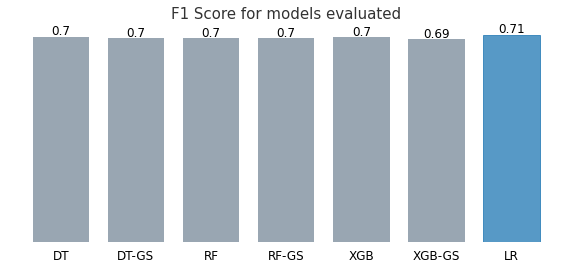

In [70]:
valuesY = df_resultados["F1"]
valuesX= df_resultados["Modelos"]

plt.figure(figsize=(10,4))
bars = plt.bar(valuesX,valuesY, width=0.75, color='lightslategrey',alpha=0.75, label='Ecuador') 
plt.title('Titulo',size=15)
bars[np.argmax(valuesY)].set_color('#1F77B4')

for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()*1.010, str(round(bar.get_height(),2)) , 
                 ha='center', color='black', fontsize=12)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True) 
plt.tick_params(axis='x',labelsize=12)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.title('F1 Score for models evaluated', alpha=0.8, size= 15)


plt.show()

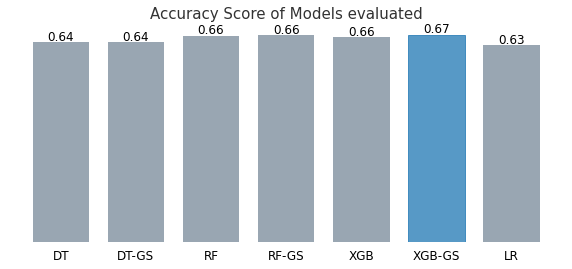

In [71]:
valuesY = df_resultados["Accuracy"]
valuesX= df_resultados["Modelos"]

plt.figure(figsize=(10,4))
bars = plt.bar(valuesX,valuesY, width=0.75, color='lightslategrey',alpha=0.75, label='Ecuador') 
plt.title('Titulo',size=15)
bars[np.argmax(valuesY)].set_color('#1F77B4')

for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()*1.010, str(round(bar.get_height(),2)) , 
                 ha='center', color='black', fontsize=12)
    
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True) 
plt.tick_params(axis='x',labelsize=12)
for spine in plt.gca().spines.values():
    spine.set_visible(False) 

plt.title('Accuracy Score of Models evaluated', alpha=0.8, size= 15)


plt.show()

## Confussion Matrix

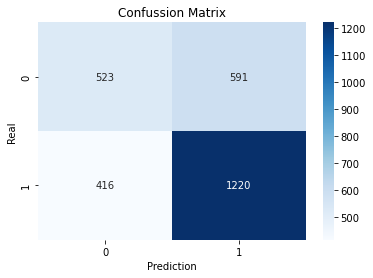

In [74]:
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt='g', cmap ="Blues")
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Confussion Matrix')
plt.show()

The target variable is not uniformly distributed, so the F1 score would be a more robust evaluation metric, and is the one we will select. 

With this selection our best model is the one built with **Logistic Regression** 